In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from copy import deepcopy

# Old

In [28]:
IDEAL = r'/home/tsdhrm/Pictures/thesis/dataset/100DataNew/positive/drishtiGS_069.png'

In [29]:
SAMPLE = r'/home/tsdhrm/Pictures/thesis/dataset/100DataNew/positive/r2_Im449.png'

In [30]:
ideal = cv2.imread(IDEAL)
ideal = cv2.cvtColor(ideal, cv2.COLOR_BGR2RGB)

sample = cv2.imread(SAMPLE)
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)

In [31]:
from skimage.exposure import match_histograms

In [32]:
matched = match_histograms(sample, ideal, multichannel=True)

/tmp/ipykernel_104907/4149609384.py:1: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(sample, ideal, multichannel=True)


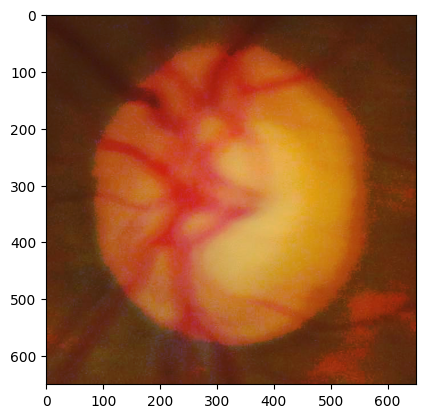

In [33]:
plt.imshow(matched)

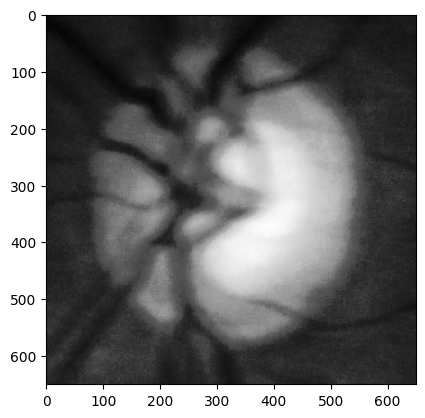

In [34]:
plt.imshow(matched[:,:,1], 'gray')

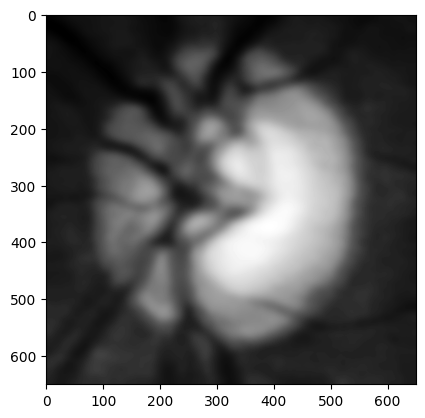

In [35]:
blurred_rgb = cv2.GaussianBlur(matched.copy(), (35,35), 0)
plt.imshow(blurred_rgb[:,:,1], 'gray')

In [90]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (70, 70))

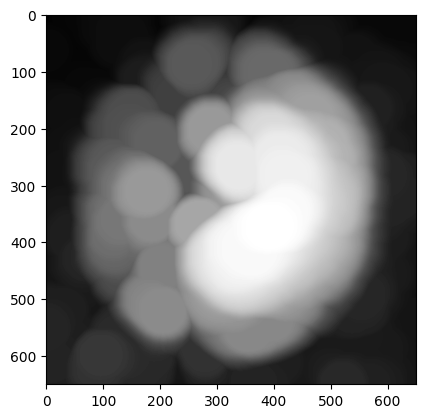

In [91]:
closed = cv2.morphologyEx(blurred_rgb[:,:,1], cv2.MORPH_DILATE, kernel)
plt.imshow(closed, 'gray')

In [100]:
clkernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (90, 80))

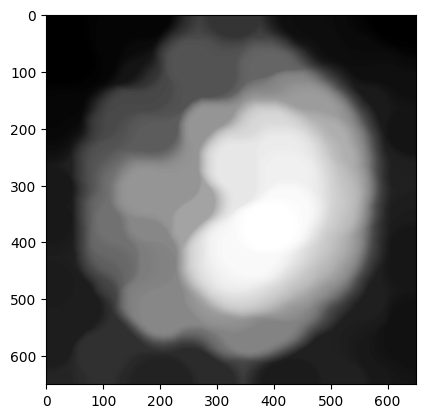

In [101]:
b = cv2.morphologyEx(closed, cv2.MORPH_CLOSE, clkernel)
plt.imshow(b, 'gray')

In [102]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

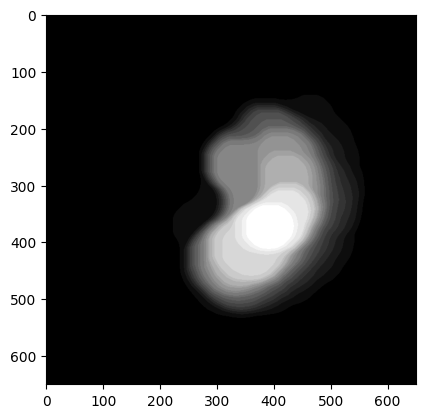

In [104]:
gmc = adjust_gamma(b, 8)
plt.imshow(gmc, 'gray')

# New

In [105]:
ideal = cv2.imread(IDEAL)
ideal = cv2.cvtColor(ideal, cv2.COLOR_BGR2RGB)

sample = cv2.imread(SAMPLE)
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)

In [106]:
from skimage.exposure import match_histograms

In [107]:
matched = match_histograms(sample, ideal, multichannel=True)

/tmp/ipykernel_104907/4149609384.py:1: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(sample, ideal, multichannel=True)


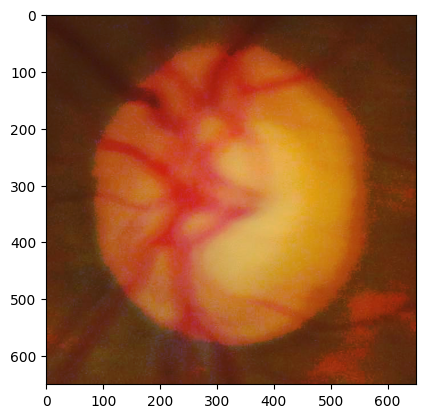

In [108]:
plt.imshow(matched)

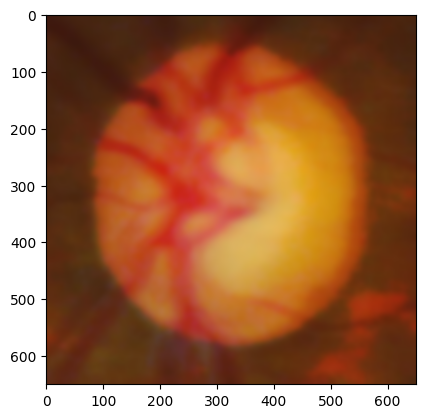

In [113]:
blurred_rgb = cv2.GaussianBlur(matched.copy(), (25,25), 0)
plt.imshow(blurred_rgb)

In [114]:
blurred_rgb[:,:,1].dtype

dtype('uint8')

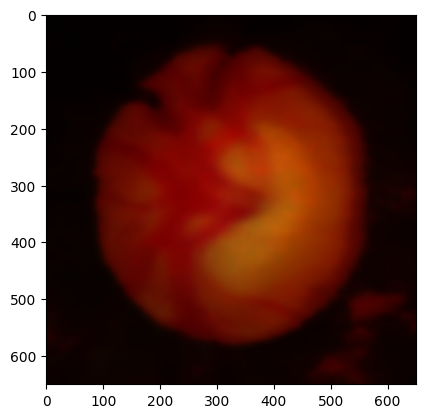

In [167]:
gmc = adjust_gamma(blurred_rgb, 3)
plt.imshow(gmc)

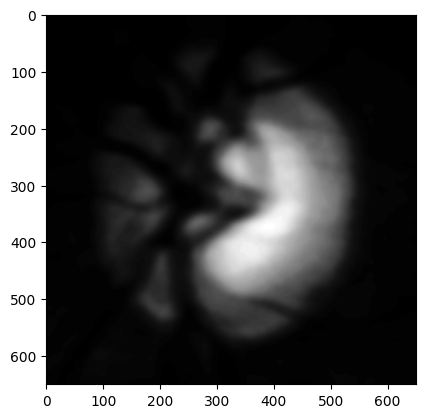

In [168]:
plt.imshow(gmc[:,:,1], 'gray')

In [169]:
plain_gray = cv2.cvtColor(gmc, cv2.COLOR_RGB2GRAY)

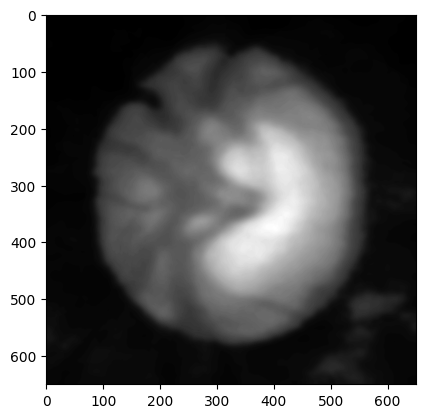

In [170]:
plt.imshow(plain_gray, 'gray')

In [171]:
akernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (70,70))

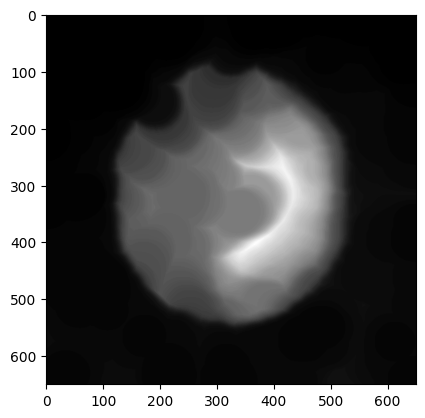

In [172]:
dilation = cv2.morphologyEx(plain_gray, cv2.MORPH_ERODE, akernel)
plt.imshow(dilation, 'gray')

In [173]:
indah = gmc[:,:,1]

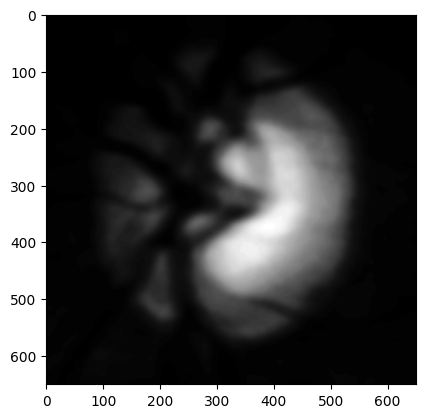

In [174]:
plt.imshow(indah, 'gray')

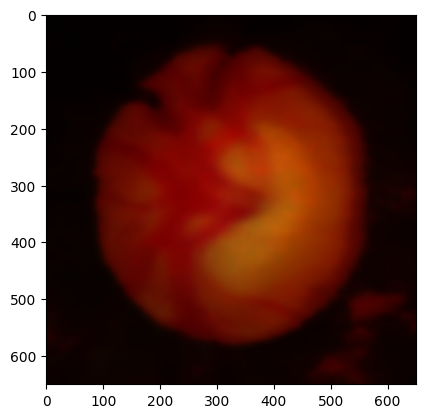

In [175]:
plt.imshow(gmc)

In [191]:
ckernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (70,70))

In [192]:
guru = cv2.morphologyEx(gmc, cv2.MORPH_DILATE, ckernel)

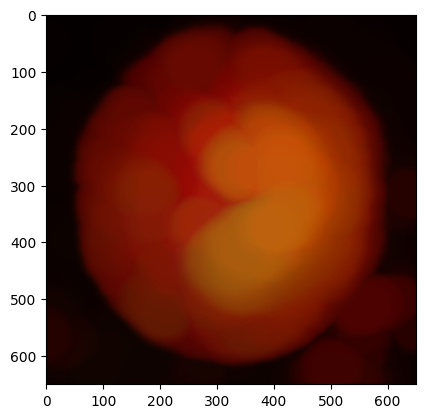

In [193]:
plt.imshow(guru)

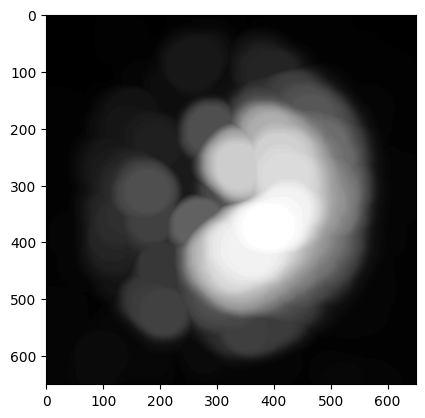

In [216]:
plt.imshow(guru[:,:,1], 'gray')

In [233]:
ret, th = cv2.threshold(guru[:,:,1], 60, 255, cv2.THRESH_BINARY)

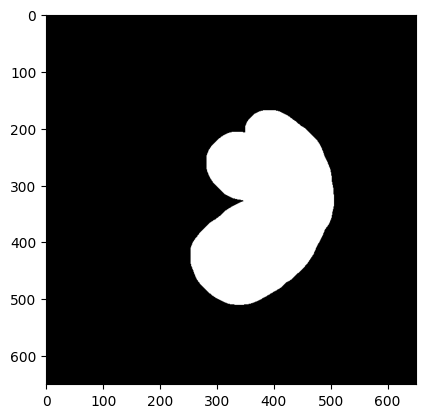

In [234]:
plt.imshow(th, 'gray')